In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import func as f
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

In [3]:
# The dataset contains 2019 observations and 9 columns.
file_path = "..\data\ALGO_daily.csv"
df = pd.read_csv(file_path)
df.set_index(df.columns[0], inplace=True)
df.head()

,open,high,low,close,return,RV,lnRV,lnRV_lag7,lnRV_lag30,lnRV_lag60
Unnamed: 0,,,,,,,,,,
2019-08-21,0.626,0.627,0.559,0.567,-0.097392,0.005644,-5.177089,-5.125362,-4.843289,-4.657663
2019-08-22,0.567,0.592,0.531,0.572,0.008780,0.006631,-5.015983,-5.236702,-4.848536,-4.693188
2019-08-23,0.573,0.589,0.546,0.576,0.006969,0.005480,-5.206578,-5.275639,-4.864684,-4.712370
2019-08-24,0.574,0.580,0.542,0.577,0.001735,0.003904,-5.545689,-5.270696,-4.877783,-4.738272
2019-08-25,0.578,0.582,0.530,0.538,-0.069984,0.004892,-5.320139,-5.283678,-4.884539,-4.778002


In [4]:
# Train-Test Split (80% train, 20% test)
train_size = int(0.8 * len(df))
test_size = len(df) - train_size
r_train, r_test = df['return'][:train_size], df['return'][train_size:]
RV_train, RV_test = df['RV'][:train_size], df['RV'][train_size:]

print("Training Set:", r_train.shape, RV_train.shape)
print("Test Set:", r_test.shape, RV_test.shape)
print(r_train.index[0], r_test.index[0])

Training Set: (1615,) (1615,)
Test Set: (404,) (404,)
2019-08-21 2024-01-22


### Box-Jenkins

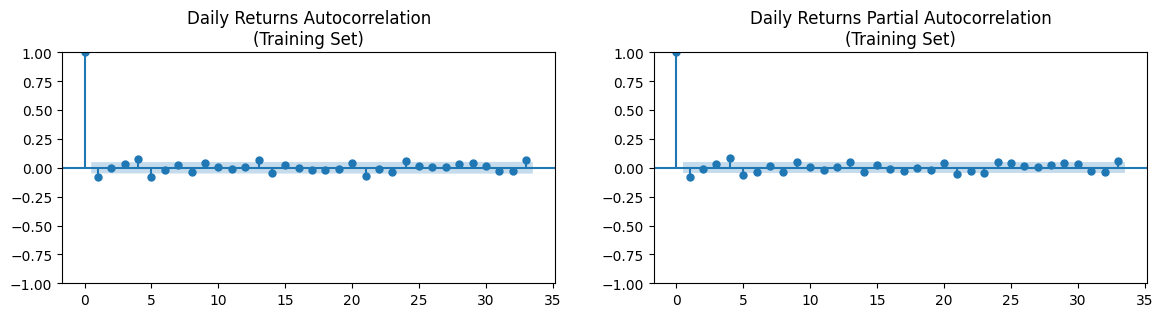

In [6]:
# ACF and PACF plots of returns
fig, ax = plt.subplots(1, 2, figsize=(14, 3))
plot_acf(r_train, title='Daily Returns Autocorrelation\n(Training Set)', ax=ax[0])
plot_pacf(r_train, title='Daily Returns Partial Autocorrelation\n(Training Set)', ax=ax[1])
plt.show()

### ARCH Framework

$$ r_t = \mu + \epsilon_t， \epsilon_t = z_t \sigma_t \\
\sigma_t^2 = \omega + \sum^p_{i=1}\alpha_i \epsilon_{t-1}^2 $$

where $r_t$ is the return series with its mean $\mu$, $\epsilon_t$ the error term and $\sigma_t^2$ the conditional variance. 

$z_t$ is assumed to be an I.I.D. process with $z_t \sim \mathcal{N}(0,1)$. 

To impose that the conditional variance is always nonnegative the parametric constraints are $\omega > 0$ and $\alpha_i \geq 0$. 

The ARCH model is a symmetric model, which implies that a positive shock has the same influence on the conditional variance as a negative shock of the same size.



### GARCH

An extended form of the ARCH(p) model is the generalized autoregressive conditional het
eroskedasticity (GARCH(p,q)) model by Bollerslev (1986).

$$ r_t = \mu + \epsilon_t， \epsilon_t = z_t \sigma_t \\
\sigma_t^2 = \omega + \sum^q_{i=1}\alpha_i \epsilon_{t-i}^2 + \sum^p_{j=1}\beta_j \sigma_{t-j}^2$$

The parametric restrictions for the GARCH model are: $\omega > 0$ and $\alpha_i \geq 0 $ $ \forall i$, $\beta_j \geq 0 $ $ \forall j$, to guarantee that $\sigma_t^2$ is always positive and $\alpha_i + \beta_j < 1 $ $ \forall i, j$ to guarantee a covariance stationary process. 

The GARCH model has a symmetric form similar to the ARCH model and therefore does
not allow for different responses to positive or negative shocks, which is considered as a
downside of the GARCH model.

In [28]:
garch_1_1 = arch_model(r_train, vol='Garch', p=1, q=1, rescale=False)
garch_1_1_fit = garch_1_1.fit(disp="off")
print(garch_1_1_fit.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                663.871
Distribution:                  Normal   AIC:                          -1319.74
Method:            Maximum Likelihood   BIC:                          -1298.19
                                        No. Observations:                 1615
Date:                Fri, Mar 07 2025   Df Residuals:                     1614
Time:                        16:33:17   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.2461  3.990e-03     61.676      0.000 [  0.238,  0.25

c:\Users\65835\AppData\Local\Programs\Python\Python39\lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
